# Assignment 4: Native language identification

In [1]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.neural_network as nn
import time
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

In [2]:
ORIGINAL_DATA_DIR = os.path.join("C:/Users/julen/OneDrive/Escritorio/IA/CS585-Natural-Language-Processing/Assignment_4", "handout", "bert_input_data")
BERT_FEATURE_DIR = os.path.join("C:/Users/julen/OneDrive/Escritorio/IA/CS585-Natural-Language-Processing/Assignment_4", "handout", "bert_output_data")
PRINT_RESULTS = "C:/Users/julen/OneDrive/Escritorio/IA/CS585-Natural-Language-Processing/Assignment_4"

## Format training data

`X` will be a matrix with `N` rows for the `N` texts in the training data, and `M` columns for the `M` features generated by BERT.

`y` will be an array of `N` class labels for training.

In [3]:
train_df = pd.read_csv(os.path.join(ORIGINAL_DATA_DIR, "lang_id_train.csv"))
eval_df = pd.read_csv(os.path.join(ORIGINAL_DATA_DIR, "lang_id_eval.csv"))
test_df = pd.read_csv(os.path.join(ORIGINAL_DATA_DIR, "lang_id_test.csv"))

In [4]:
bert_vectors_train = []
with open(os.path.join(BERT_FEATURE_DIR, "train.jsonlines"), "rt") as infile:
    for line in infile: # Each text has to be just one file
        bert_data = json.loads(line)
        for t in bert_data["features"]:
            # Only extract the [CLS] vector used for classification
            if t["token"] == "[CLS]":
                # We only use the representation at the final layer of the network
                bert_vectors_train.append(t["layers"][0]["values"])
                break

In [5]:
bert_vectors_eval = []
with open(os.path.join(BERT_FEATURE_DIR, "eval.jsonlines"), "rt") as infile:
    for line in infile: # Each text has to be just one file
        bert_data = json.loads(line)
        for t in bert_data["features"]:
            # Only extract the [CLS] vector used for classification
            if t["token"] == "[CLS]":
                # We only use the representation at the final layer of the network
                bert_vectors_eval.append(t["layers"][0]["values"])
                break

In [6]:
bert_vectors_test = []
with open(os.path.join(BERT_FEATURE_DIR, "test.jsonlines"), "rt") as infile:
    for line in infile: # Each text has to be just one file
        bert_data = json.loads(line)
        for t in bert_data["features"]:
            # Only extract the [CLS] vector used for classification
            if t["token"] == "[CLS]":
                # We only use the representation at the final layer of the network
                bert_vectors_test.append(t["layers"][0]["values"])
                break

In [7]:
X_train = np.array(bert_vectors_train)
y_train = train_df["native_language"].values
X_eval = np.array(bert_vectors_eval)
y_eval = eval_df["native_language"].values
X_test = np.array(bert_vectors_test)
y_test = test_df["native_language"].values

# Logistic Regression model

In [8]:
def Build_LR (inv_reg, pnlt, slvr):
    
    lr_model = LogisticRegression(max_iter = 1000, penalty = pnlt, C = inv_reg, solver = slvr)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_eval)
    accuracy = accuracy_score(y_eval, y_pred)
    nIter = lr_model.n_iter_
    
    return(accuracy, nIter)

### Grid search over different Solvers and C's

In [9]:
result_LR = pd.DataFrame(columns = ['Solver', 'Penalty', 'C parameter', 'Accuracy', 'n Iterations', 'time'])
penalty = ['l2']
solver = ['liblinear', 'sag', 'newton-cg']
inverse_regularization = [0.001, 0.01, 0.1, 1, 10, 100]


for slvr in solver:
    for pnlt in penalty:
        for inv_reg in inverse_regularization:
            time_start = time.time()
            accuracy, nIter = Build_LR(inv_reg, pnlt, slvr)
            time_taken = (time.time() - time_start)/60
            result_LR = result_LR.append(pd.DataFrame([[slvr, pnlt, inv_reg, accuracy, nIter, time_taken]], 
                                        columns = ['Solver', 'Penalty', 'C parameter', 'Accuracy', 'n Iterations', 'time']))
            print(slvr, pnlt, inv_reg, accuracy, nIter, time_taken)
            result_LR.to_csv(os.path.join(PRINT_RESULTS,'result_LR_1.csv'), index = False)


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.001 0.256 [6] 0.04312300284703573


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.01 0.332 [10] 0.0816421627998352


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1 0.3485 [14] 0.1549536426862081


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 1 0.3265 [19] 0.289677894115448


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 10 0.3075 [24] 0.469467556476593


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 100 0.2955 [26] 0.6052863081296285


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


sag l2 0.001 0.2535 [65 69 67 66 69 64 65 66 61 67] 0.3889819343884786


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


sag l2 0.01 0.3345 [254 303 292 259 303 258 250 228 247 250] 1.6040648261706034


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KeyboardInterrupt: 

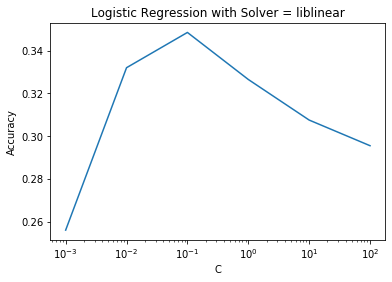

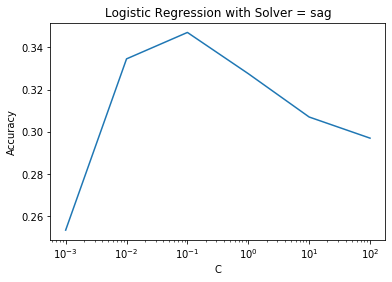

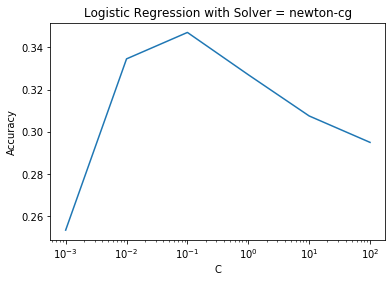

In [10]:
result_LR_1 = pd.read_csv(os.path.join(PRINT_RESULTS, 'result_LR_1.csv'))
solver = ['liblinear', 'sag', 'newton-cg']
for sol in solver:
    x = result_LR_1.loc[result_LR_1['Solver'] == sol]['C parameter']
    y = result_LR_1.loc[result_LR_1['Solver'] == sol]['Accuracy']
    plt.plot(x,y)
    plt.title('Logistic Regression with Solver = {}'.format(sol))
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.xscale('log')
    plt.savefig(os.path.join(PRINT_RESULTS, 'img_LR_1_{}.png'.format(sol)))
    plt.show()


In [11]:
inv_reg = 0.1
pnlt = 'l2'
slvr = 'sag'
time_start = time.time()
accuracy, nIter = Build_LR(inv_reg, pnlt, slvr) # Done with maxIter = 1000
time_taken = (time.time() - time_start)/60
print(slvr, pnlt, inv_reg, accuracy, nIter, time_taken) 
# When it converges has a worst result         

C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


sag l2 0.1 0.347 [716 771 805 501 686 655 435 465 646 508] 3.3397537310918173


### 'sag' solving method seems to obtain a better accuracy, but as it does not converge even with 500 max. iterations, 'liblinear' solving method will be used. Now a narrower search will be done

In [12]:
result_LR = pd.DataFrame(columns = ['Solver', 'Penalty', 'C parameter', 'Accuracy', 'n Iterations', 'time'])
penalty = ['l2']
solver = ['liblinear']
inverse_regularization = np.arange(0.01,0.301, 0.001)

for slvr in solver:
    for pnlt in penalty:
        for inv_reg in inverse_regularization:
            time_start = time.time()
            accuracy, nIter = Build_LR(inv_reg, pnlt, slvr)
            time_taken = (time.time() - time_start)/60
            result_LR = result_LR.append(pd.DataFrame([[slvr, pnlt, inv_reg, accuracy, nIter, time_taken]], 
                                        columns = ['Solver', 'Penalty', 'C parameter', 'Accuracy', 'n Iterations', 'time']))
            print(slvr, pnlt, inv_reg, accuracy, nIter, time_taken)
        result_LR.to_csv(os.path.join(PRINT_RESULTS,'result_LR_2.csv'), index = False)


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.01 0.332 [10] 0.07873355547587077


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.011 0.332 [10] 0.08256438970565796


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.011999999999999999 0.334 [10] 0.08010563453038534


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.012999999999999998 0.3365 [10] 0.08173399766286214


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.013999999999999997 0.3385 [10] 0.08205411434173585


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.014999999999999996 0.3395 [10] 0.08277144034703572


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.015999999999999993 0.3415 [11] 0.0851227601369222


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.016999999999999994 0.3425 [11] 0.08906530141830445


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.017999999999999995 0.3435 [11] 0.08897619247436524


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.018999999999999993 0.343 [11] 0.09223822355270386


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.01999999999999999 0.3435 [11] 0.09749523798624675


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.02099999999999999 0.343 [11] 0.09438726107279459


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.021999999999999992 0.342 [11] 0.09486744006474813


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.02299999999999999 0.3435 [11] 0.09876818656921386


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.023999999999999987 0.3445 [11] 0.09824914534886678


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.024999999999999988 0.345 [12] 0.10061776638031006


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.02599999999999999 0.3445 [11] 0.0993762731552124


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.02699999999999999 0.342 [11] 0.10105354785919189


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.027999999999999983 0.3425 [12] 0.10235301653544109


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.028999999999999984 0.3445 [12] 0.10331525007883707


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.029999999999999985 0.3455 [12] 0.10138878027598063


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.030999999999999986 0.346 [12] 0.10208699703216553


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03199999999999998 0.3465 [12] 0.10589850743611653


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03299999999999998 0.347 [12] 0.10400250752766928


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03399999999999998 0.346 [12] 0.10409580866495768


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03499999999999998 0.346 [12] 0.10852388540903728


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.035999999999999976 0.346 [12] 0.10802849133809407


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03699999999999998 0.3475 [12] 0.11253806749979654


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03799999999999998 0.347 [12] 0.11458751360575357


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03899999999999998 0.347 [12] 0.11056764920552571


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.03999999999999997 0.3475 [12] 0.10955207347869873


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.040999999999999974 0.3495 [12] 0.11172448794047038


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.041999999999999975 0.3495 [12] 0.11148273944854736


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.042999999999999976 0.3495 [12] 0.11122287511825561


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.04399999999999998 0.35 [13] 0.11490207115809123


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.04499999999999997 0.351 [12] 0.11550804773966471


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.04599999999999997 0.353 [13] 0.11957589785257976


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.04699999999999997 0.3535 [13] 0.11842217048009236


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.047999999999999966 0.353 [12] 0.11593592166900635


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.04899999999999997 0.3545 [12] 0.1198484460512797


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.04999999999999997 0.3555 [13] 0.12564462025960285


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.05099999999999997 0.3545 [13] 0.12369264364242553


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.05199999999999997 0.3525 [13] 0.11999841531117757


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.052999999999999964 0.3525 [13] 0.12037464380264282


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.053999999999999965 0.3525 [13] 0.1234057625134786


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.054999999999999966 0.3525 [13] 0.1212709625562032


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.05599999999999996 0.3525 [13] 0.12458901405334473


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.05699999999999996 0.3515 [13] 0.1258641481399536


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.05799999999999996 0.351 [13] 0.12729894717534382


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.05899999999999996 0.3505 [13] 0.12689326206843057


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.05999999999999996 0.35 [13] 0.1260517636934916


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06099999999999996 0.3505 [13] 0.12975448767344158


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06199999999999996 0.35 [13] 0.12774131695429483


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06299999999999996 0.35 [13] 0.12631812890370686


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06399999999999995 0.35 [13] 0.12435449759165446


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06499999999999995 0.3505 [13] 0.12671573956807455


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06599999999999995 0.35 [13] 0.12130162318547567


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06699999999999995 0.3505 [13] 0.12494738896687825


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06799999999999995 0.3505 [13] 0.12228441635767619


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06899999999999995 0.3505 [13] 0.1268961230913798


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.06999999999999995 0.35 [13] 0.12720640897750854


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07099999999999995 0.3485 [13] 0.12804977893829345


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07199999999999994 0.3485 [13] 0.12580993970235188


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07299999999999994 0.349 [13] 0.12253482739130656


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07399999999999994 0.3485 [13] 0.1232699473698934


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07499999999999994 0.3495 [13] 0.12849200169245403


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07599999999999994 0.35 [13] 0.12879060904184977


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07699999999999994 0.351 [13] 0.12976165215174357


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07799999999999994 0.351 [13] 0.12693269650141398


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07899999999999993 0.351 [13] 0.13059005339940388


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.07999999999999993 0.351 [13] 0.12649314403533934


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08099999999999993 0.3495 [13] 0.12871476411819457


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08199999999999993 0.3495 [13] 0.1301625609397888


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08299999999999993 0.349 [13] 0.131826384862264


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08399999999999994 0.3495 [13] 0.1306810975074768


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08499999999999994 0.3495 [13] 0.12922203540802002


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08599999999999992 0.35 [13] 0.13132352431615193


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08699999999999992 0.3505 [13] 0.13451990286509197


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08799999999999993 0.3505 [13] 0.13421993652979533


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08899999999999993 0.349 [13] 0.13583112955093385


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.08999999999999993 0.3495 [13] 0.13537713686625164


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09099999999999993 0.3495 [13] 0.13231914043426513


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09199999999999993 0.349 [13] 0.1357255021731059


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09299999999999993 0.349 [14] 0.13944449424743652


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09399999999999993 0.349 [14] 0.13801851669947307


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09499999999999992 0.3485 [14] 0.13938122987747192


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09599999999999992 0.348 [14] 0.14052705764770507


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09699999999999992 0.3485 [14] 0.1434963345527649


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09799999999999992 0.349 [14] 0.14110294580459595


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09899999999999992 0.3485 [13] 0.1395885189374288


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.09999999999999992 0.3485 [13] 0.13561634620030721


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10099999999999992 0.349 [14] 0.13753693103790282


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10199999999999991 0.3495 [14] 0.13909477790196736


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10299999999999991 0.349 [14] 0.14241543610890706


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10399999999999991 0.349 [13] 0.1356281280517578


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10499999999999991 0.349 [14] 0.13622270027796426


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10599999999999991 0.349 [14] 0.14088544845581055


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10699999999999991 0.3485 [14] 0.1421656608581543


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10799999999999992 0.349 [14] 0.14009788036346435


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10899999999999992 0.349 [14] 0.14340349435806274


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.10999999999999992 0.3485 [14] 0.14236211776733398


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1109999999999999 0.3485 [14] 0.14368460178375245


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1119999999999999 0.3495 [14] 0.14099895159403483


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1129999999999999 0.349 [14] 0.1437502423922221


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.11399999999999991 0.3485 [14] 0.14580649932225545


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.11499999999999991 0.348 [14] 0.145290740331014


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.11599999999999991 0.348 [14] 0.14766556024551392


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.11699999999999991 0.348 [14] 0.14400860865910847


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1179999999999999 0.347 [14] 0.14760078191757203


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1189999999999999 0.3465 [14] 0.1429535110791524


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1199999999999999 0.3465 [14] 0.1422296166419983


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1209999999999999 0.3465 [14] 0.14363107681274415


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1219999999999999 0.3465 [14] 0.1427015980084737


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1229999999999999 0.347 [14] 0.1450236678123474


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1239999999999999 0.3465 [14] 0.14558143218358358


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1249999999999999 0.3465 [14] 0.14346866210301717


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.12599999999999992 0.3465 [14] 0.1445456306139628


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1269999999999999 0.3465 [14] 0.14230715831120808


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1279999999999999 0.346 [14] 0.14583506186803183


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1289999999999999 0.346 [14] 0.14357022047042847


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1299999999999999 0.3465 [14] 0.1424737294514974


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1309999999999999 0.3465 [14] 0.14270923932393392


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1319999999999999 0.346 [14] 0.1444900592168172


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1329999999999999 0.346 [14] 0.14411793947219848


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1339999999999999 0.347 [14] 0.146650763352712


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1349999999999999 0.347 [14] 0.14826531807581583


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1359999999999999 0.347 [14] 0.1481931209564209


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1369999999999999 0.347 [14] 0.14709815581639607


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1379999999999999 0.3475 [14] 0.14670244852701822


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1389999999999999 0.347 [14] 0.14814420541127524


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1399999999999999 0.347 [14] 0.1515528162320455


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1409999999999999 0.3475 [14] 0.15225146611531576


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1419999999999999 0.3475 [14] 0.14842912753423054


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1429999999999999 0.3475 [14] 0.15042759974797568


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1439999999999999 0.3475 [14] 0.14779516458511352


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1449999999999999 0.3465 [14] 0.1516615947087606


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1459999999999999 0.3465 [14] 0.15165427923202515


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.14699999999999988 0.3465 [14] 0.15561691522598267


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.14799999999999988 0.3465 [14] 0.15079145034154257


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.14899999999999988 0.347 [14] 0.15338162581125894


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.14999999999999988 0.346 [14] 0.1526143749554952


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.15099999999999988 0.346 [14] 0.15077661673227946


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.15199999999999989 0.3455 [14] 0.15233561197916667


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.15299999999999989 0.3455 [14] 0.15390792687733967


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1539999999999999 0.3455 [14] 0.14944397211074828


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1549999999999999 0.3455 [14] 0.15050785144170126


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1559999999999999 0.345 [14] 0.14791892766952514


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1569999999999999 0.345 [14] 0.14921166896820068


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1579999999999999 0.3445 [14] 0.15182090997695924


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1589999999999999 0.344 [14] 0.15187227725982666


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1599999999999999 0.344 [14] 0.15416120688120524


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.1609999999999999 0.344 [14] 0.15423050324122112


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16199999999999987 0.3435 [14] 0.15462159315745036


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16299999999999987 0.3435 [14] 0.15409049193064372


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16399999999999987 0.3435 [14] 0.15474751790364583


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16499999999999987 0.3425 [14] 0.15741842985153198


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16599999999999987 0.3425 [14] 0.15368074973424276


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16699999999999987 0.342 [14] 0.1527990937232971


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16799999999999987 0.3415 [14] 0.15520384311676025


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16899999999999987 0.3415 [14] 0.15311226844787598


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.16999999999999987 0.342 [14] 0.15444868405659992


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17099999999999987 0.342 [14] 0.15810502370198568


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17199999999999988 0.342 [14] 0.15729117393493652


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17299999999999988 0.3425 [15] 0.15682618618011473


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17399999999999988 0.343 [15] 0.1662477652231852


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17499999999999988 0.343 [15] 0.15780913829803467


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17599999999999988 0.343 [15] 0.15862202246983845


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17699999999999988 0.3435 [15] 0.1609494209289551


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17799999999999988 0.344 [15] 0.16065078179041545


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17899999999999985 0.3445 [15] 0.16009252071380614


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.17999999999999985 0.345 [15] 0.162250812848409


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18099999999999986 0.345 [15] 0.1651253859202067


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18199999999999986 0.3445 [15] 0.16421819130579632


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18299999999999986 0.3445 [15] 0.16303445100784303


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18399999999999986 0.3445 [15] 0.1690532406171163


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18499999999999986 0.3445 [15] 0.16765786012013753


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18599999999999986 0.344 [15] 0.16461201906204223


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18699999999999986 0.343 [15] 0.18719557921091715


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18799999999999986 0.3425 [15] 0.16601599057515462


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18899999999999986 0.3425 [15] 0.1664484103520711


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.18999999999999986 0.3425 [15] 0.1644653836886088


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19099999999999986 0.3425 [15] 0.1706257422765096


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19199999999999987 0.3425 [15] 0.1633127013842265


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19299999999999987 0.3425 [15] 0.1652218778928121


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19399999999999984 0.3425 [16] 0.16777981122334798


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19499999999999984 0.3425 [15] 0.16903340419133503


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19599999999999984 0.3425 [15] 0.17021448612213136


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19699999999999984 0.3425 [16] 0.17043982744216918


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19799999999999984 0.3425 [15] 0.16572972933451335


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19899999999999984 0.3415 [15] 0.16616054773330688


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.19999999999999984 0.3415 [15] 0.1680011789004008


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20099999999999985 0.342 [16] 0.17004058758417764


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20199999999999985 0.342 [15] 0.16579843759536744


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20299999999999985 0.342 [15] 0.16280800898869832


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20399999999999985 0.343 [15] 0.16568203767140707


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20499999999999985 0.3425 [15] 0.16521112521489462


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20599999999999985 0.3425 [15] 0.16933258771896362


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20699999999999985 0.344 [16] 0.16817487080891927


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20799999999999985 0.3445 [16] 0.16871513923009238


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20899999999999985 0.3445 [16] 0.1677389621734619


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.20999999999999985 0.3445 [15] 0.17028891642888386


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21099999999999983 0.344 [15] 0.1666260043780009


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21199999999999983 0.3435 [15] 0.16642287969589234


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21299999999999983 0.3435 [15] 0.16785060962041218


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21399999999999983 0.3435 [15] 0.169564688205719


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21499999999999983 0.3435 [15] 0.16862560113271077


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21599999999999983 0.3435 [15] 0.17009084224700927


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21699999999999983 0.344 [15] 0.16775456666946412


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21799999999999983 0.3435 [16] 0.17176815668741863


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21899999999999983 0.344 [15] 0.17084877093633016


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.21999999999999983 0.344 [15] 0.16892524560292563


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22099999999999984 0.3445 [15] 0.17220746278762816


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22199999999999984 0.3445 [15] 0.17189213037490844


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22299999999999984 0.3445 [15] 0.16955726146697997


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22399999999999984 0.3445 [15] 0.17048834562301635


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22499999999999984 0.345 [15] 0.1725230018297831


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2259999999999998 0.3445 [15] 0.1714301904042562


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2269999999999998 0.3445 [15] 0.17034780581792194


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22799999999999981 0.3445 [15] 0.17313969135284424


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22899999999999981 0.3445 [15] 0.17189007600148518


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.22999999999999982 0.345 [15] 0.17392122745513916


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23099999999999982 0.345 [15] 0.1799965262413025


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23199999999999982 0.345 [15] 0.1851442575454712


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23299999999999982 0.345 [15] 0.1790877898534139


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23399999999999982 0.345 [16] 0.18867658376693724


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23499999999999982 0.345 [15] 0.18758086363474527


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23599999999999982 0.345 [15] 0.17651188770929974


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23699999999999982 0.345 [15] 0.17656471729278564


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23799999999999982 0.3445 [16] 0.17754809856414794


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23899999999999982 0.345 [15] 0.17582125663757325


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.23999999999999982 0.345 [15] 0.17731415033340453


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.24099999999999983 0.3455 [16] 0.17822588284810384


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.24199999999999983 0.346 [16] 0.18005885283152262


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2429999999999998 0.346 [16] 0.17870673735936482


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2439999999999998 0.345 [15] 0.17464690605799357


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2449999999999998 0.346 [15] 0.18075350522994996


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2459999999999998 0.346 [16] 0.1822487672170003


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2469999999999998 0.345 [16] 0.18069961865743


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2479999999999998 0.345 [15] 0.17548123598098755


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2489999999999998 0.345 [15] 0.1708526611328125


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2499999999999998 0.345 [15] 0.17885480324427286


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2509999999999998 0.345 [15] 0.17289947668711345


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2519999999999998 0.344 [15] 0.17393474181493124


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2529999999999998 0.3445 [15] 0.17655498584111531


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2539999999999998 0.3435 [15] 0.17785489161809284


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2549999999999998 0.343 [15] 0.17626447677612306


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2559999999999998 0.3435 [15] 0.18110026121139527


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2569999999999998 0.3435 [15] 0.173859973748525


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2579999999999998 0.3435 [16] 0.17721287409464517


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2589999999999998 0.343 [15] 0.17765500148137411


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2599999999999998 0.3425 [16] 0.17889675696690877


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2609999999999998 0.3425 [16] 0.1783716122309367


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2619999999999998 0.3415 [16] 0.1812406857808431


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2629999999999998 0.3415 [16] 0.18051939010620116


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2639999999999998 0.3415 [16] 0.18484338521957397


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2649999999999998 0.3415 [15] 0.1817328453063965


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2659999999999998 0.341 [16] 0.18333377043406168


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2669999999999998 0.3415 [16] 0.18514641523361205


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2679999999999998 0.343 [16] 0.1814878463745117


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2689999999999998 0.343 [15] 0.1817638357480367


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2699999999999998 0.3435 [16] 0.18436803023020426


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2709999999999998 0.344 [16] 0.1851251681645711


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2719999999999998 0.344 [15] 0.18339502414067585


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2729999999999998 0.344 [15] 0.18141087293624877


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2739999999999998 0.344 [15] 0.17897479931513469


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2749999999999998 0.3435 [15] 0.18088214000066122


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2759999999999998 0.343 [16] 0.18282186190287272


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2769999999999998 0.343 [15] 0.178876527150472


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2779999999999998 0.343 [15] 0.18071577548980713


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2789999999999998 0.343 [15] 0.1796581784884135


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2799999999999998 0.3425 [16] 0.1840526541074117


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2809999999999998 0.3425 [16] 0.1852195183436076


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.2819999999999998 0.3425 [15] 0.1820019563039144


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28299999999999975 0.3425 [16] 0.18519954284032186


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28399999999999975 0.3425 [16] 0.1837762435277303


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28499999999999975 0.3425 [16] 0.1851366440455119


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28599999999999975 0.3425 [16] 0.1862003246943156


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28699999999999976 0.3425 [16] 0.1881871263186137


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28799999999999976 0.3425 [16] 0.18756253321965535


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28899999999999976 0.342 [16] 0.18719921112060547


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.28999999999999976 0.342 [16] 0.18326386610666912


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29099999999999976 0.342 [16] 0.19222607612609863


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29199999999999976 0.342 [16] 0.1871694842974345


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29299999999999976 0.342 [15] 0.18277899424235025


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29399999999999976 0.3415 [16] 0.18723593155543009


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29499999999999976 0.3415 [16] 0.18721715211868287


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29599999999999976 0.3415 [16] 0.1918876886367798


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29699999999999976 0.342 [16] 0.1846176544825236


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29799999999999977 0.342 [16] 0.18418581088383992


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29899999999999977 0.3415 [15] 0.1836460590362549


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


liblinear l2 0.29999999999999977 0.3415 [16] 0.18789276679356892


In [13]:
result_LR.to_csv(os.path.join(PRINT_RESULTS,'result_LR_2.csv'), index = False)

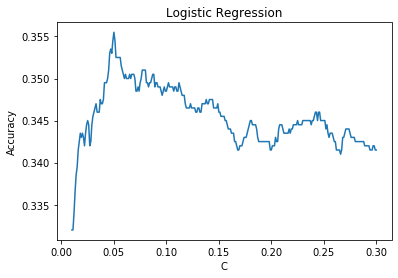

In [14]:
result_LR_2 = pd.read_csv(os.path.join(PRINT_RESULTS, 'result_LR_2.csv'))
x = result_LR_2['C parameter']
y = result_LR_2['Accuracy']
plt.plot(x,y)
plt.title('Logistic Regression')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(PRINT_RESULTS, 'img_LR_2.png'))
plt.show()




In [15]:
# result_LR = result_LR.reset_index()
print('The best Logistic Regression model has C =:', result_LR_2.reset_index().loc[result_LR_2['Accuracy'].idxmax()]['C parameter'])

The best Logistic Regression model has C =: 0.04999999999999997


### Accuracy in the test set

In [16]:
lr_model = LogisticRegression(max_iter = 250, penalty = 'l2', C = 0.05, solver = 'liblinear')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy for the best found model of Logistic Regression is:', accuracy)

C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy for the best found model of Logistic Regression is: 0.353


# Support Vector Machine

In [17]:
from sklearn import svm

In [18]:
def Build_SVM (kernel, C):
    
    clf = svm.SVC(gamma='scale', decision_function_shape='ovr', kernel = kernel, C = C)
    clf.fit(X_train, y_train)
    acc = clf.score(X_eval, y_eval)
    
    return acc


### Grid search over different Kernel and C

In [19]:
kernel = ['rbf', 'linear', 'sigmoid']
C = [0.001, 0.01, 0.1, 1, 10, 100]

Result_SVM = pd.DataFrame(columns = ['Kernel', 'C', 'Accuracy', 'Time'])

for ker in kernel:
    for c in C:
        time_start = time.time()
        accuracy = Build_SVM(ker,c)
        time_total = (time.time() - time_start)/60
        print('kernel = ', ker,', C = ', c, ', Accuracy = ', accuracy, ', Time needed = ', time_total)
        Result_SVM = Result_SVM.append(pd.DataFrame([[ker,c,accuracy,time_total]],
                                                    columns = ['Kernel', 'C', 'Accuracy', 'Time']))
        Result_SVM.to_csv(os.path.join(PRINT_RESULTS, 'Result_SVM.csv'), index = False)
        

kernel =  rbf , C =  0.001 , Accuracy =  0.2065 , Time needed =  0.9489847222963969
kernel =  rbf , C =  0.01 , Accuracy =  0.2065 , Time needed =  0.9534102598826091
kernel =  rbf , C =  0.1 , Accuracy =  0.2215 , Time needed =  0.9334008574485779
kernel =  rbf , C =  1 , Accuracy =  0.3235 , Time needed =  0.8091099659601847
kernel =  rbf , C =  10 , Accuracy =  0.349 , Time needed =  0.7301477193832397
kernel =  rbf , C =  100 , Accuracy =  0.329 , Time needed =  0.877189302444458
kernel =  linear , C =  0.001 , Accuracy =  0.2355 , Time needed =  0.8826253334681193
kernel =  linear , C =  0.01 , Accuracy =  0.315 , Time needed =  0.7586045742034913
kernel =  linear , C =  0.1 , Accuracy =  0.3345 , Time needed =  0.6702623089154561
kernel =  linear , C =  1 , Accuracy =  0.299 , Time needed =  0.701819117863973
kernel =  linear , C =  10 , Accuracy =  0.2645 , Time needed =  0.8463528633117676
kernel =  linear , C =  100 , Accuracy =  0.2635 , Time needed =  0.8313185016314188
kern

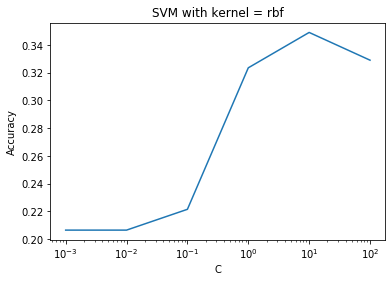

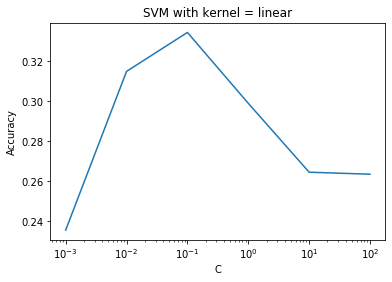

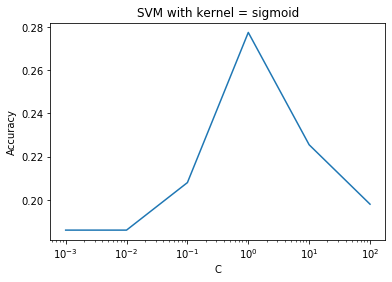

In [20]:
result_SVM = pd.read_csv(os.path.join(PRINT_RESULTS, 'result_SVM.csv'))
for ker in kernel:
    x = result_SVM.loc[result_SVM['Kernel'] == ker]['C']
    y = result_SVM.loc[result_SVM['Kernel'] == ker]['Accuracy']
    plt.plot(x,y)
    plt.title('SVM with kernel = {}'.format(ker))
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.xscale('log')
    plt.savefig(os.path.join(PRINT_RESULTS, 'img_SVM_{}.png'.format(ker)))
    plt.show()


### More accurate search for each solver

In [21]:
kernel = ['rbf', 'linear', 'sigmoid']
C_rbf = np.append(np.arange(1,10,1) , np.arange(10,100,5))
C_linear = np.append(np.arange(0.01,0.1, 0.01), np.arange(0.1,1,0.05))
C_sigmoid = np.append(np.arange(0.1,1, 0.1), np.arange(1,10,0.5))

print(C_rbf)
Result_SVM = pd.DataFrame(columns = ['Kernel', 'C', 'Accuracy', 'Time'])

for ker in kernel:
    if ker == 'rbf':
        C = C_rbf
    elif ker == 'linear':
        C = C_linear
    else:
        C = C_sigmoid
    for c in C:
        time_start = time.time()
        accuracy = Build_SVM(ker,c)
        time_total = (time.time() - time_start)/60
        print('kernel = ', ker,', C = ', c, ', Accuracy = ', accuracy, ', Time needed = ', time_total)
        Result_SVM = Result_SVM.append(pd.DataFrame([[ker,c,accuracy,time_total]],
                                                    columns = ['Kernel', 'C', 'Accuracy', 'Time']))
        Result_SVM.to_csv(os.path.join(PRINT_RESULTS, 'Result_SVM_accurate.csv'), index = False)

[ 1  2  3  4  5  6  7  8  9 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80
 85 90 95]
kernel =  rbf , C =  1 , Accuracy =  0.3235 , Time needed =  0.8077017386754354
kernel =  rbf , C =  2 , Accuracy =  0.341 , Time needed =  0.7700896104176839
kernel =  rbf , C =  3 , Accuracy =  0.3455 , Time needed =  0.7536527713139852
kernel =  rbf , C =  4 , Accuracy =  0.3435 , Time needed =  0.7437429189682007
kernel =  rbf , C =  5 , Accuracy =  0.344 , Time needed =  0.7359028339385987
kernel =  rbf , C =  6 , Accuracy =  0.342 , Time needed =  0.7315263350804647
kernel =  rbf , C =  7 , Accuracy =  0.3495 , Time needed =  0.7298924207687378
kernel =  rbf , C =  8 , Accuracy =  0.351 , Time needed =  0.7267566760381062
kernel =  rbf , C =  9 , Accuracy =  0.351 , Time needed =  0.7330541094144185
kernel =  rbf , C =  10 , Accuracy =  0.349 , Time needed =  0.7285954316457113
kernel =  rbf , C =  15 , Accuracy =  0.3385 , Time needed =  0.7289783755938212
kernel =  rbf , C =  20 , Accuracy =  0.

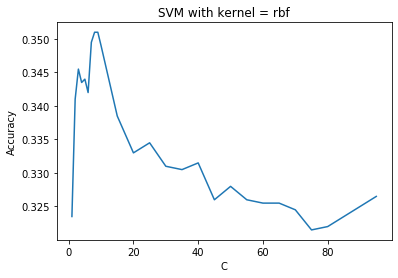

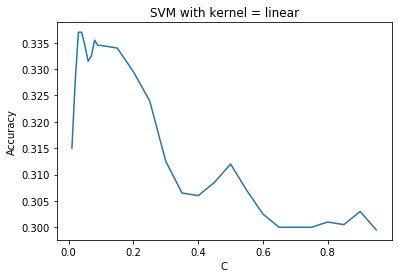

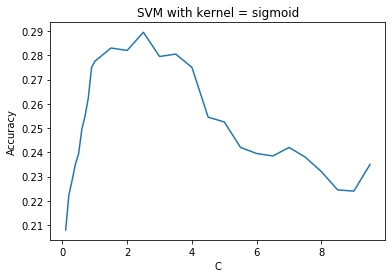

In [22]:
result_SVM = pd.read_csv(os.path.join(PRINT_RESULTS, 'result_SVM_accurate.csv'))
for ker in kernel:
    x = result_SVM.loc[result_SVM['Kernel'] == ker]['C']
    y = result_SVM.loc[result_SVM['Kernel'] == ker]['Accuracy']
    plt.plot(x,y)
    plt.title('SVM with kernel = {}'.format(ker))
    plt.xlabel('C')
    plt.ylabel('Accuracy')
#     plt.xscale('log')
    plt.savefig(os.path.join(PRINT_RESULTS, 'img_SVM_accurate_{}.png'.format(ker)))
    plt.show()

### More accurate search for rbf Kernel

In [23]:
kernel = 'rbf'
C_rbf = np.arange(7,10,0.1)
Result_SVM_rbf = pd.DataFrame(columns = ['Kernel', 'C', 'Accuracy', 'Time'])

for c in C_rbf:
    time_start = time.time()
    accuracy = Build_SVM(kernel,c)
    time_total = (time.time() - time_start)/60
    print('kernel = ', kernel,', C = ', c, ', Accuracy = ', accuracy, ', Time needed = ', time_total)
    Result_SVM_rbf = Result_SVM_rbf.append(pd.DataFrame([[kernel,c,accuracy,time_total]],
                                                columns = ['Kernel', 'C', 'Accuracy', 'Time']))
    Result_SVM_rbf.to_csv(os.path.join(PRINT_RESULTS, 'Result_SVM_accurate_rbf.csv'), index = False)

kernel =  rbf , C =  7.0 , Accuracy =  0.3495 , Time needed =  1.6568549871444702
kernel =  rbf , C =  7.1 , Accuracy =  0.348 , Time needed =  1.7883302688598632
kernel =  rbf , C =  7.199999999999999 , Accuracy =  0.348 , Time needed =  2.0213128487269083
kernel =  rbf , C =  7.299999999999999 , Accuracy =  0.348 , Time needed =  0.9873108347256978
kernel =  rbf , C =  7.399999999999999 , Accuracy =  0.3475 , Time needed =  0.7405338168144227
kernel =  rbf , C =  7.499999999999998 , Accuracy =  0.3475 , Time needed =  0.7467381755510966
kernel =  rbf , C =  7.599999999999998 , Accuracy =  0.347 , Time needed =  0.7389245748519897
kernel =  rbf , C =  7.6999999999999975 , Accuracy =  0.348 , Time needed =  0.7421489596366883
kernel =  rbf , C =  7.799999999999997 , Accuracy =  0.35 , Time needed =  0.7419863104820251
kernel =  rbf , C =  7.899999999999997 , Accuracy =  0.3505 , Time needed =  0.7377062519391377
kernel =  rbf , C =  7.9999999999999964 , Accuracy =  0.351 , Time needed 

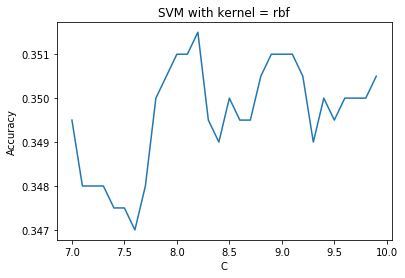

In [24]:
x = Result_SVM_rbf.loc[result_SVM['Kernel'] == 'rbf']['C']
y = Result_SVM_rbf.loc[result_SVM['Kernel'] == 'rbf']['Accuracy']
plt.plot(x,y)
plt.title('SVM with kernel = {}'.format('rbf'))
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(PRINT_RESULTS, 'img_SVM_accurate_rbf_{}.png'.format('rbf')))
plt.show()

### Accuracy of the best model in the test set: 

In [25]:
# result_LR = result_LR.reset_index()
# print(Result_SVM_rbf.reset_index().loc[Result_SVM_rbf['Accuracy']])
C =  Result_SVM_rbf.loc[Result_SVM_rbf['Accuracy'] == max(Result_SVM_rbf['Accuracy'])]['C']

print('The best Logistic Regression model has C =:', C[0])
kernel = 'rbf'
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', kernel = kernel, C = C)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print('the accuracy of the best model in the test set is: ', acc)


The best Logistic Regression model has C =: 8.199999999999996
the accuracy of the best model in the test set is:  0.346


## Neural Networks with sklearn

In [26]:
def Build_NN (nLayer, nHiddenNeuron, ActivationFunction):

    # Build Neural Network
    nnObj = nn.MLPClassifier(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
                            activation = ActivationFunction, verbose = False,
                            max_iter = 1000, random_state = 20191108, solver = 'adam')
    thisFit = nnObj.fit(X_train, y_train)
    y_pred = nnObj.predict(X_eval)
    Loss = nnObj.loss_
    accuracy = accuracy_score(y_eval, y_pred)
    nIterations = nnObj.n_iter_ 
    
    return (Loss, accuracy, nIterations)

### Grid search over different activation functions, hidden layers and number of neurons per layer

In [27]:
result = pd.DataFrame(columns = ['activation function', 'nLayer', 'nHiddenNeuron', 'nIterations', 'Loss', 'Accuracy', 'Time (minutes)'])

act_fun = ['logistic' , 'relu']
hid_layers = [2, 5, 15]
num_neurons = np.arange(5,100, 5)
for function in act_fun:
    for layers in hid_layers:
        for neurons in num_neurons:
            time_start = time.time()
            Loss , accuracy, nIterations = Build_NN(nLayer = layers , nHiddenNeuron = neurons , ActivationFunction = function)
            time_total = (time.time() - time_start)/60
            print(function , layers, neurons, Loss, accuracy, time_total)
            result = result.append(pd.DataFrame([[function , layers, neurons, nIterations, Loss, accuracy, time_total]], 
                                    columns = ['activation function', 'nLayer', 'nHiddenNeuron', 'nIterations', 'Loss', 'Accuracy', 'Time (minutes)']))
        result.to_csv(os.path.join(PRINT_RESULTS,'resultNN.csv'), index = False)
result

logistic 2 5 1.5828934694758197 0.2515 0.3546722133954366
logistic 2 10 1.001854782816171 0.2665 0.6486062169075012


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


logistic 2 15 0.42893443794672886 0.252 0.865604019165039


C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


logistic 2 20 0.154820552420747 0.2595 0.9220491091410319
logistic 2 25 0.06664571400881046 0.2445 0.8645042061805726
logistic 2 30 0.053585259637527034 0.267 0.775990919272105
logistic 2 35 0.05009602246290897 0.29 0.6455508629480998
logistic 2 40 0.0520858664802735 0.2825 0.586495021979014
logistic 2 45 0.03906641453605017 0.276 0.6731125513712565
logistic 2 50 0.04374367188309929 0.286 0.5687813997268677
logistic 2 55 0.036755542886659984 0.3055 0.6231518348058065
logistic 2 60 0.04085495704592911 0.3115 0.5756219943364461
logistic 2 65 0.03984115770603167 0.302 0.5826974431673686
logistic 2 70 0.039944363916864394 0.309 0.6310492197672526
logistic 2 75 0.038407531596002825 0.2995 0.5849037249883016
logistic 2 80 0.0400502816478439 0.3105 0.5584168553352356
logistic 2 85 0.039486608857314386 0.308 0.5796024998029073
logistic 2 90 0.045157472101114836 0.3045 0.7046008229255676
logistic 2 95 0.0353511611716744 0.3055 0.7467531283696492
logistic 5 5 2.3026288759903917 0.1 0.02236965099

,activation function,nLayer,nHiddenNeuron,nIterations,Loss,Accuracy,Time (minutes)
0,logistic,2,5,484,1.582893,0.2515,0.354672
0,logistic,2,10,796,1.001855,0.2665,0.648606
0,logistic,2,15,1000,0.428934,0.2520,0.865604
0,logistic,2,20,1000,0.154821,0.2595,0.922049
0,logistic,2,25,876,0.066646,0.2445,0.864504
...,...,...,...,...,...,...,...
0,relu,15,75,139,0.187703,0.2560,0.717590
0,relu,15,80,130,0.219485,0.2600,0.699817
0,relu,15,85,134,0.159853,0.2710,0.756152
0,relu,15,90,100,0.306318,0.2725,0.609734


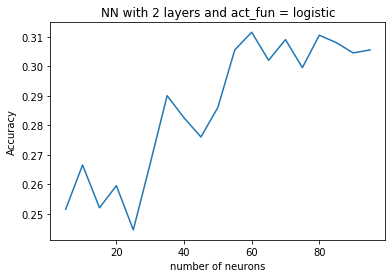

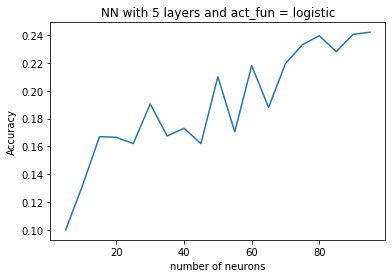

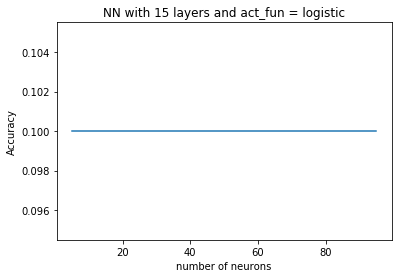

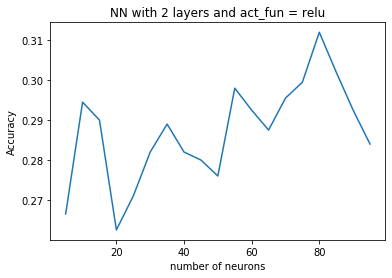

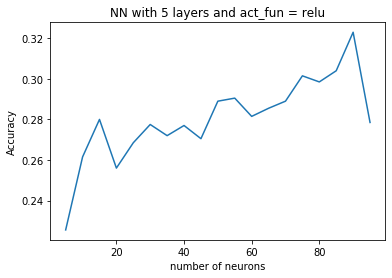

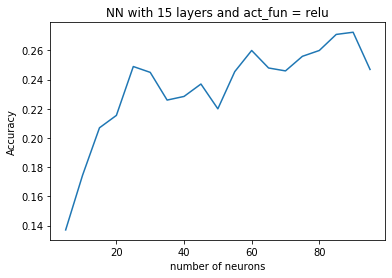

In [28]:
result_NN = pd.read_csv(os.path.join(PRINT_RESULTS, 'resultNN.csv'))
act_fun = ['logistic' , 'relu']
hid_layers = [2, 5, 15]
for fun in act_fun:
    for layers in hid_layers:
        x = result_NN.loc[(result_NN['activation function'] == fun) & (result_NN['nLayer'] == layers)]['nHiddenNeuron']
        y = result_NN.loc[(result_NN['activation function'] == fun) & (result_NN['nLayer'] == layers)]['Accuracy']
        plt.plot(x,y)
        plt.title('NN with {} layers and act_fun = {}'.format(layers, fun))
        plt.xlabel('number of neurons')
        plt.ylabel('Accuracy')
        plt.savefig(os.path.join(PRINT_RESULTS, 'img_NN_{}_layers_{}_fun_2.png'.format(layers, fun)))
        plt.show()

### It seems that the 'logistic' and 'relu' activation functions behave simillarly, but the 'logistic' one seems to have some trouble with Neural Networks with a lot of layers. This could be due to a local minimum found

### Another grid search for 5 hidden layers and 'relu' activation function

In [29]:
result = pd.DataFrame(columns = ['activation function', 'nLayer', 'nHiddenNeuron', 'nIterations', 'Loss', 'Accuracy', 'Time (minutes)'])

act_fun = ['relu']
hid_layers = [5]
num_neurons = np.arange(50,500,10)
for function in act_fun:
    for layers in hid_layers:
        for neurons in num_neurons:
            time_start = time.time()
            Loss , accuracy, nIterations = Build_NN(nLayer = layers , nHiddenNeuron = neurons , ActivationFunction = function)
            time_total = (time.time() - time_start)/60
            print(function , layers, neurons, Loss, accuracy, time_total)
            result = result.append(pd.DataFrame([[function , layers, neurons, nIterations, Loss, accuracy, time_total]], 
                                    columns = ['activation function', 'nLayer', 'nHiddenNeuron', 'nIterations', 'Loss', 'Accuracy', 'Time (minutes)']))
            result.to_csv(os.path.join(PRINT_RESULTS,'result_NN_adams_5.csv'), index = False)
result

relu 5 50 0.06359775613089695 0.289 0.24235015312830607
relu 5 60 0.05782701140561586 0.2815 0.2226436495780945
relu 5 70 0.46381918070105604 0.289 0.23274973233540852
relu 5 80 0.04841064103598623 0.2985 0.24139859676361083
relu 5 90 0.035398017225476454 0.323 0.3156541347503662
relu 5 100 0.05233681693011479 0.3 0.35406134923299154
relu 5 110 0.03786768092145343 0.2995 0.25590983231862385
relu 5 120 0.03156071538818252 0.307 0.31620885531107584
relu 5 130 0.042711466465930915 0.3055 0.3202177127202352
relu 5 140 0.0454169413430925 0.3205 0.24595951239267985
relu 5 150 0.05425326986359375 0.311 0.36037830511728924
relu 5 160 0.07927908860309302 0.313 0.27910031080245973
relu 5 170 0.14360051727897866 0.301 0.36826601028442385
relu 5 180 0.03679286619525917 0.3175 0.4938165863355001
relu 5 190 0.03613171604529451 0.3085 0.48631417751312256
relu 5 200 0.11650871352362457 0.3095 0.3930147806803385
relu 5 210 0.02982432324005402 0.315 0.7649764657020569
relu 5 220 0.04044184449305872 0.32

,activation function,nLayer,nHiddenNeuron,nIterations,Loss,Accuracy,Time (minutes)
0,relu,5,50,132,0.063598,0.2890,0.242350
0,relu,5,60,110,0.057827,0.2815,0.222644
0,relu,5,70,104,0.463819,0.2890,0.232750
0,relu,5,80,95,0.048411,0.2985,0.241399
0,relu,5,90,111,0.035398,0.3230,0.315654
0,relu,5,100,118,0.052337,0.3000,0.354061
0,relu,5,110,77,0.037868,0.2995,0.255910
0,relu,5,120,88,0.031561,0.3070,0.316209
0,relu,5,130,82,0.042711,0.3055,0.320218
0,relu,5,140,59,0.045417,0.3205,0.245960


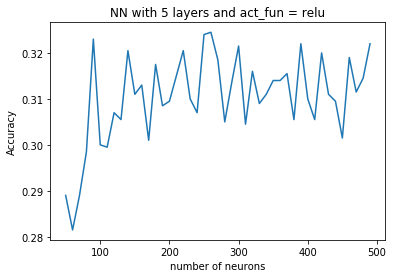

In [30]:
result = pd.read_csv(os.path.join(PRINT_RESULTS, 'result_NN_adams_5.csv'))
act_fun = ['relu']
hid_layers = [5]
num_neurons = np.arange(50,500,1)
x = result['nHiddenNeuron']
y = result['Accuracy']
plt.plot(x,y)
plt.title('NN with 5 layers and act_fun = relu')
plt.xlabel('number of neurons')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(PRINT_RESULTS, 'img_NN_5_layers_relu_fun_3.png'))
plt.show()

### Accuracy in the test set for the best model:

In [31]:
time_start = time.time()
nHiddenNeuron =  result.loc[result['Accuracy'] == max(result['Accuracy'])]['nHiddenNeuron'].iloc[0]
print(f'The best Neural Network model has 5 layers, {nHiddenNeuron} hidden neurons and relu activation function')

nnObj = nn.MLPClassifier(hidden_layer_sizes = (nHiddenNeuron,)*5,
                        activation = 'relu', verbose = False,
                        max_iter = 1000, random_state = 20191108, solver = 'adam')

nnObj.fit(X_train, y_train)
acc = nnObj.score(X_test, y_test)
time_total = (time.time() - time_start)/60
print('the accuracy of the best model in the test set is: ', acc, accuracy)
print('time taken to build the model:', time_total)

The best Neural Network model has 5 layers, 260 hidden neurons and relu activation function
the accuracy of the best model in the test set is:  0.325 0.322
time taken to build the model: 1.0542335391044617







# Neural Networks with Keras

In [32]:
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Dense, Activation
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### Function to develop different neural networks. They can have dropoffs between layers too

In [33]:
def Build_NN_simple (epochs, batch_size, units_layers, nLayers, percent_dropout = None, test_val = None):
    
    model = Sequential()
    model.add(Dense(units = units_layers, activation = 'relu', input_dim = 768))
    for i in range(1,nLayers):
        model.add(Dense(units = units_layers, activation = 'relu'))
        if percent_dropout != None:
            model.add(Dropout(percent_dropout)) 
    model.add(Dense(units = 10, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

    y_train_transformed = LabelBinarizer().fit_transform(y_train)
    y_eval_transformed = LabelBinarizer().fit_transform(y_eval)
    
    history = model.fit(X_train, y_train_transformed, 
                        epochs = epochs, batch_size = batch_size,
                        validation_data=(X_eval, y_eval_transformed))
    
    Loss, accuracy = model.evaluate(X_eval, y_eval_transformed)
    
    if test_val == 'test':
        y_test_transformed = LabelBinarizer().fit_transform(y_test)
        Loss, accuracy = model.evaluate(X_test, y_test_transformed)

    return (accuracy)

In [34]:
result_NN = pd.DataFrame(columns = ['nLayers', 'nHiddenNeuron', 'epochs', 
                                    'batch_size', 'percent_dropout', 'Accuracy', 
                                    'Time (minutes)'])


epochs = 15
batch_size = 32
units_layers = np.arange(10,100,10)
nLayers = [2,5,10,15]
percent_dropout = 0

for layer in nLayers:
    for units in units_layers:
        print(layer)
        print(units)
        time_start = time.time()
        accuracy = Build_NN_simple(epochs, batch_size, units, layer)
        time_total = (time.time() - time_start)/60
        print(layer, units, accuracy, time_total)
        result_NN = result_NN.append(pd.DataFrame([[layer , units, epochs, batch_size, percent_dropout, accuracy, time_total]], 
                                    columns = ['nLayers', 'nHiddenNeuron', 'epochs', 
                                    'batch_size', 'percent_dropout', 'Accuracy', 
                                    'Time (minutes)']))
        result_NN.to_csv(os.path.join(PRINT_RESULTS,'result_NN_keras.csv'), index = False)
result_NN


2
10
Train on 6000 samples, validate on 2000 samples
Epoch 1/15
6000/6000 [==============================] - 0s 49us/step - loss: 2.2905 - accuracy: 0.1220 - val_loss: 2.2594 - val_accuracy: 0.1470
Epoch 2/15
6000/6000 [==============================] - 0s 31us/step - loss: 2.1978 - accuracy: 0.1813 - val_loss: 2.1713 - val_accuracy: 0.1965
Epoch 3/15
6000/6000 [==============================] - 0s 28us/step - loss: 2.1031 - accuracy: 0.2262 - val_loss: 2.1063 - val_accuracy: 0.2205
Epoch 4/15
6000/6000 [==============================] - 0s 31us/step - loss: 2.0418 - accuracy: 0.2527 - val_loss: 2.0731 - val_accuracy: 0.2395
Epoch 5/15
6000/6000 [==============================] - 0s 33us/step - loss: 1.9874 - accuracy: 0.2812 - val_loss: 2.0626 - val_accuracy: 0.2415
Epoch 6/15
6000/6000 [==============================] - 0s 31us/step - loss: 1.9447 - accuracy: 0.3012 - val_loss: 2.0307 - val_accuracy: 0.2755
Epoch 7/15
6000/6000 [==============================] - 0s 31us/step - loss: 

,nLayers,nHiddenNeuron,epochs,batch_size,percent_dropout,Accuracy,Time (minutes)
0,2,10,15,32,0,0.3255,0.055747
0,2,20,15,32,0,0.3275,0.056810
0,2,30,15,32,0,0.3340,0.060616
0,2,40,15,32,0,0.3265,0.058570
0,2,50,15,32,0,0.3430,0.066593
0,2,60,15,32,0,0.3325,0.070527
0,2,70,15,32,0,0.3360,0.071583
0,2,80,15,32,0,0.3160,0.076514
0,2,90,15,32,0,0.3185,0.075558
0,5,10,15,32,0,0.1950,0.071746


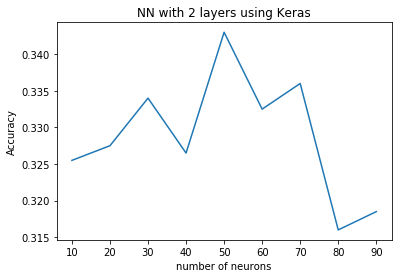

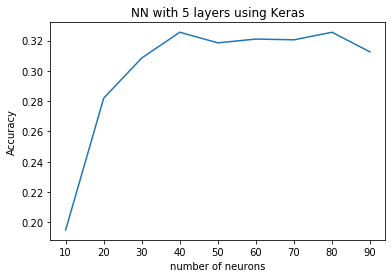

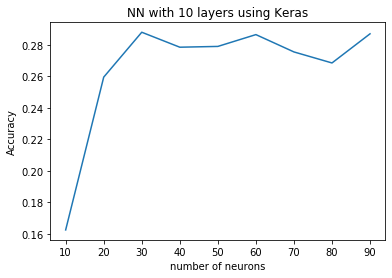

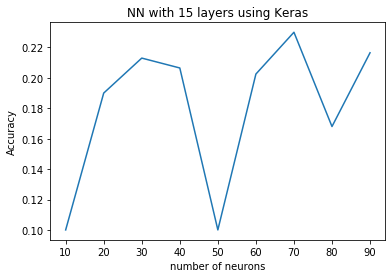

In [35]:
result_NN = pd.read_csv(os.path.join(PRINT_RESULTS, 'result_NN_keras.csv'))
hid_layers = [2, 5, 10, 15]
for layers in hid_layers:
    x = result_NN.loc[result_NN['nLayers'] == layers]['nHiddenNeuron']
    y = result_NN.loc[result_NN['nLayers'] == layers]['Accuracy']
    plt.plot(x,y)
    plt.title('NN with {} layers using Keras'.format(layers))
    plt.xlabel('number of neurons')
    plt.ylabel('Accuracy')
    plt.savefig(os.path.join(PRINT_RESULTS, 'img_NN_keras_{}_layers_.png'.format(layers)))
    plt.show()

### Accuracy for the best model

In [36]:
time_start = time.time()
units, layer =  result_NN.loc[result_NN['Accuracy'] == max(result_NN['Accuracy'])][['nHiddenNeuron', 'nLayers']].iloc[0]
print(f'The best Neural Network model has {layer} layers, {units} hidden neurons and relu activation function')

accuracy = Build_NN_simple(epochs, batch_size, units, layer, test_val = 'test')

time_total = (time.time() - time_start)/60
print('the accuracy of the best model in the test set is: ', accuracy)
print('time taken to build the model:', time_total)

The best Neural Network model has 2 layers, 50 hidden neurons and relu activation function
Train on 6000 samples, validate on 2000 samples
Epoch 1/15
6000/6000 [==============================] - 0s 60us/step - loss: 2.2388 - accuracy: 0.1628 - val_loss: 2.1572 - val_accuracy: 0.2300
Epoch 2/15
6000/6000 [==============================] - 0s 45us/step - loss: 2.0510 - accuracy: 0.2585 - val_loss: 2.0312 - val_accuracy: 0.2680
Epoch 3/15
6000/6000 [==============================] - 0s 46us/step - loss: 1.9304 - accuracy: 0.3238 - val_loss: 1.9621 - val_accuracy: 0.3100
Epoch 4/15
6000/6000 [==============================] - 0s 46us/step - loss: 1.8474 - accuracy: 0.3542 - val_loss: 1.9693 - val_accuracy: 0.3010
Epoch 5/15
6000/6000 [==============================] - 0s 42us/step - loss: 1.7842 - accuracy: 0.3685 - val_loss: 1.9482 - val_accuracy: 0.3180
Epoch 6/15
6000/6000 [==============================] - 0s 49us/step - loss: 1.7492 - accuracy: 0.3875 - val_loss: 1.9159 - val_accuracy

# Evaluation of the best model

In [11]:
from sklearn.metrics import accuracy_score, auc, f1_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_score, precision_recall_curve, jaccard_score

In [12]:
lr_model = LogisticRegression(max_iter = 1000, penalty = 'l2', C = 0.05, solver = 'liblinear')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_eval)
accuracy = accuracy_score(y_eval, y_pred)
accuracy

C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3555

### Accuracy and F1 score metrics for each class

In [13]:
languages = ['Japanese', 'Korean', 'Vietnamese', 'Mandarin', 'Russian',
             'Thai', 'Spanish', 'Cantonese', 'Polish', 'Arabic']
i = 0
accur = []
f1sc = []
table = pd.DataFrame()
# table = table.set_index(languages)
for lan in languages:
    X_test_lan = X_test[test_df['native_language'] == lan]
    y_test_lan = y_test[test_df['native_language'] == lan]
    y_pred = lr_model.predict(X_test_lan)
    y_prob = lr_model.predict_proba(X_test_lan)
    accuracy = accuracy_score(y_test_lan, y_pred)
    accur.append(accuracy)
    f1score = f1_score(y_test_lan, y_pred, average = None, labels = languages)
    f1sc.append(f1score[i])
    i += 1

metrics = pd.DataFrame(columns = languages)
metrics = metrics.T
metrics['Accuracy'] = accur
metrics['F1 score'] = f1sc
metrics

C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Programs_julen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetri

,Accuracy,F1 score
Japanese,0.385,0.555957
Korean,0.345,0.513011
Vietnamese,0.255,0.406375
Mandarin,0.310,0.473282
Russian,0.395,0.566308
Thai,0.460,0.630137
Spanish,0.370,0.540146
Cantonese,0.300,0.461538
Polish,0.360,0.529412
Arabic,0.350,0.518519


### Confusion matrix

In [17]:
y_pred = lr_model.predict(X_test)
y_pred_s = pd.Series(y_pred, name = 'Predicted')
y_test_s = pd.Series(y_test, name = 'Real')
df_confussion = pd.crosstab(y_test_s , y_pred_s)
df_confussion.div(200)

Predicted,Arabic,Cantonese,Japanese,Korean,Mandarin,Polish,Russian,Spanish,Thai,Vietnamese
Real,,,,,,,,,,
Arabic,0.350,0.095,0.075,0.040,0.070,0.050,0.050,0.125,0.050,0.095
Cantonese,0.055,0.300,0.060,0.065,0.170,0.070,0.020,0.050,0.080,0.130
Japanese,0.055,0.100,0.385,0.075,0.060,0.095,0.070,0.040,0.065,0.055
Korean,0.060,0.120,0.130,0.345,0.050,0.040,0.055,0.055,0.050,0.095
Mandarin,0.065,0.195,0.080,0.085,0.310,0.020,0.050,0.065,0.040,0.090
Polish,0.110,0.060,0.030,0.035,0.050,0.360,0.140,0.075,0.065,0.075
Russian,0.065,0.045,0.075,0.040,0.080,0.100,0.395,0.060,0.065,0.075
Spanish,0.080,0.065,0.075,0.035,0.100,0.075,0.055,0.370,0.070,0.075
Thai,0.050,0.060,0.065,0.075,0.065,0.045,0.035,0.045,0.460,0.100


In [19]:
df_confussion.div(300)

Predicted,Arabic,Cantonese,Japanese,Korean,Mandarin,Polish,Russian,Spanish,Thai,Vietnamese
Real,,,,,,,,,,
Arabic,0.233333,0.063333,0.050000,0.026667,0.046667,0.033333,0.033333,0.083333,0.033333,0.063333
Cantonese,0.036667,0.200000,0.040000,0.043333,0.113333,0.046667,0.013333,0.033333,0.053333,0.086667
Japanese,0.036667,0.066667,0.256667,0.050000,0.040000,0.063333,0.046667,0.026667,0.043333,0.036667
Korean,0.040000,0.080000,0.086667,0.230000,0.033333,0.026667,0.036667,0.036667,0.033333,0.063333
Mandarin,0.043333,0.130000,0.053333,0.056667,0.206667,0.013333,0.033333,0.043333,0.026667,0.060000
Polish,0.073333,0.040000,0.020000,0.023333,0.033333,0.240000,0.093333,0.050000,0.043333,0.050000
Russian,0.043333,0.030000,0.050000,0.026667,0.053333,0.066667,0.263333,0.040000,0.043333,0.050000
Spanish,0.053333,0.043333,0.050000,0.023333,0.066667,0.050000,0.036667,0.246667,0.046667,0.050000
Thai,0.033333,0.040000,0.043333,0.050000,0.043333,0.030000,0.023333,0.030000,0.306667,0.066667


In [21]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

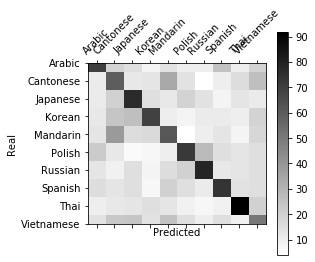

In [23]:
plot_confusion_matrix(df_confussion)